<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/08_Pandas_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Intro to Pandas**

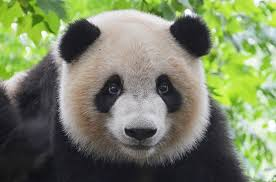


Pandas is a library with high-level data structures and manipulation tools:


* Data loading/saving
* Data exploration
* Filtering, selecting
* Plotting/visualization
* Computing summary statistics
* Groupby operations

DataFrame Object
* Represents a tabular, spreadsheet-like data structure
* Ordered collection of columns
* Each column can be a different value type (numeric, string, boolean, etc.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###**Object creation**



Pandas deals with the following three data structures −

* Series (1D, labeled homogeneous array)
* DataFrame (2D, genaral 2d labeled, size-mutable tabular structure with potentially hetegoneously typed columns)
* Panel (3D, size-mutable array)

These data structures are built on top of Numpy array, which means they are fast.

The best way to think of these data structures is that the higher dimensional data structure is a container of its lower dimensional data structure. For example, DataFrame is a container of Series, Panel is a container of DataFrame.

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)

In [ ]:
# Series
s = pd.Series([1,3,5,np.nan, 6,7,8], name = 'numbers')
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    7.0
6    8.0
Name: numbers, dtype: float64

In [ ]:
# The axis labels are collectively referred to as the index
s = pd.Series(np.random.rand(5), index = ['a', 'b','c','d','e'])
s

a    0.004037
b    0.573835
c    0.934298
d    0.008138
e    0.906811
dtype: float64

In [ ]:
# indexing
s['e']

0.9068108230418447

In [ ]:
s[1:4]

b    0.573835
c    0.934298
d    0.008138
dtype: float64

In [ ]:
s+s

a    0.008073
b    1.147671
c    1.868597
d    0.016277
e    1.813622
dtype: float64

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels

In [ ]:
s[1:]+s[:-1]

a         NaN
b    1.147671
c    1.868597
d    0.016277
e         NaN
dtype: float64

In [ ]:
# Series can be instantiated from dicts

dicts = {'a':1, 'b':2, 'c':3, 'd':4}
pd.Series(dicts)

a    1
b    2
c    3
d    4
dtype: int64

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

In [ ]:
d = {'one': s[1:], 'two':s[:-1]}
df = pd.DataFrame(d)
df

,one,two
a,NaN,0.004037
b,0.573835,0.573835
c,0.934298,0.934298
d,0.008138,0.008138
e,0.906811,NaN


In [ ]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
df.columns

Index(['one', 'two'], dtype='object')

In [ ]:
# column selection 

df['two']

a    0.004037
b    0.573835
c    0.934298
d    0.008138
e         NaN
Name: two, dtype: float64

In [ ]:
# add column 

df['three'] = df['one']+ df['two']
df['flag'] = df['two'] > 0.4
df

,one,two,three,flag
a,NaN,0.004037,NaN,False
b,0.573835,0.573835,1.147671,True
c,0.934298,0.934298,1.868597,True
d,0.008138,0.008138,0.016277,False
e,0.906811,NaN,NaN,False


In [ ]:
# delete columns with del and popped

del df['two']
df.pop('flag')
df

,one,three
a,NaN,NaN
b,0.573835,1.147671
c,0.934298,1.868597
d,0.008138,0.016277
e,0.906811,NaN


In [ ]:
# insert
df['one_new'] = df['one'][2:4] 
df

,one,three,one_new
a,NaN,NaN,NaN
b,0.573835,1.147671,NaN
c,0.934298,1.868597,0.934298
d,0.008138,0.016277,0.008138
e,0.906811,NaN,NaN


In [ ]:
df.insert(1, 'new_two', 'a')
df

,one,new_two,three,one_new
a,NaN,a,NaN,NaN
b,0.573835,a,1.147671,NaN
c,0.934298,a,1.868597,0.934298
d,0.008138,a,0.016277,0.008138
e,0.906811,a,NaN,NaN


###**Loading data**

Pandas has a lot of convenient built-in methods for reading data of various formats.

In [ ]:
[x for x in dir(pd) if 'read' in x]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

download and add famous Iris Data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper - The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis
https://drive.google.com/file/d/1ZkcSr0aLRn9hhLH80k4uG9z69lSJKkrk/view?usp=sharing

In [ ]:
# load from csv file

data = pd.read_csv('iris.csv')

In [ ]:
# display top rows of the dataset
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# display the number of rows randomly

data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
126,6.2,2.8,4.8,1.8,virginica
149,5.9,3.0,5.1,1.8,virginica
119,6.0,2.2,5.0,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
44,5.1,3.8,1.9,0.4,setosa
39,5.1,3.4,1.5,0.2,setosa
131,7.9,3.8,6.4,2.0,virginica
96,5.7,2.9,4.2,1.3,versicolor
46,5.1,3.8,1.6,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [ ]:
# shape of dataset
data.shape

(150, 5)

In [ ]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
# display the specific rows using 'iloc' - index integen or 'loc' - index name

print(data.iloc[5])
print(data.loc[data['species'] == 'setosa'])

sepal_length       5.4
sepal_width        3.9
petal_length       1.7
petal_width        0.4
species         setosa
Name: 5, dtype: object
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8 

In [ ]:
# count number of times species occur in data set

data["species"].value_counts() 

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [ ]:
# add column with code for species
data['target']=data['species']
data['target'].loc[data['species']=='versicolor']=1
data['target'].loc[data['species']=='virginica']=2
data['target'].loc[data['species']=='setosa']=3

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,target
112,6.8,3.0,5.5,2.1,virginica,2
59,5.2,2.7,3.9,1.4,versicolor,1
40,5.0,3.5,1.3,0.3,setosa,3
75,6.6,3.0,4.4,1.4,versicolor,1
108,6.7,2.5,5.8,1.8,virginica,2
8,4.4,2.9,1.4,0.2,setosa,3
14,5.8,4.0,1.2,0.2,setosa,3
88,5.6,3.0,4.1,1.3,versicolor,1
106,4.9,2.5,4.5,1.7,virginica,2
110,6.5,3.2,5.1,2.0,virginica,2


In [ ]:
# see the statistics of the dataset
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# verify the features are of which datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   target        150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [ ]:
# Summarizing the missing values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
target          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26b5cd9320>,
      dtype=object)

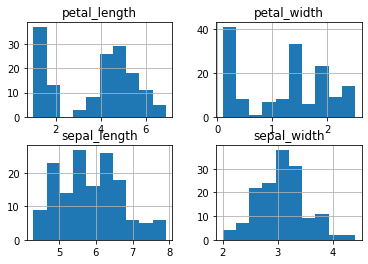

In [ ]:
pd.plotting.hist_frame(data)

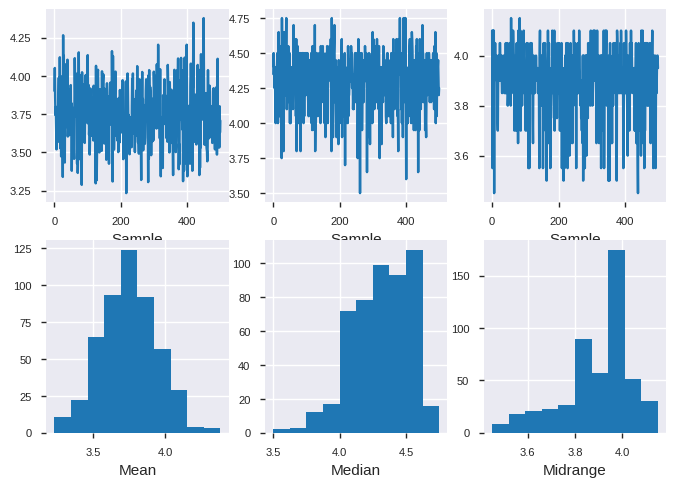

In [ ]:
pd.plotting.bootstrap_plot(data['petal_length'])
plt.show()

setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

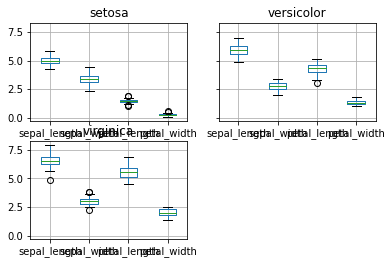

In [ ]:
pd.plotting.boxplot_frame_groupby(data.groupby('species'))

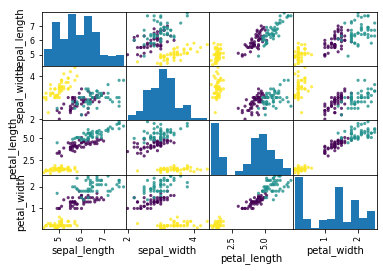

In [ ]:
# ploting scatter graph of species comparing all features to each other

pd.plotting.scatter_matrix(data, c=data['target'], marker='o', s=10, alpha = .8)
plt.show()

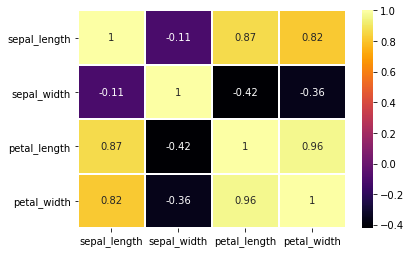

In [ ]:
# seaborn heatmap
import seaborn as sns
sns.heatmap(data.corr(),cmap='inferno', linecolor = 'white', linewidths = 1, annot = True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


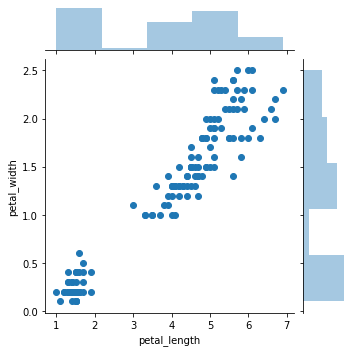

In [ ]:
# jointplot shows bivariate scatterplots and univariate histograms

sns.jointplot(x="petal_length", y="petal_width", data=data,size=5,kind="scatter")


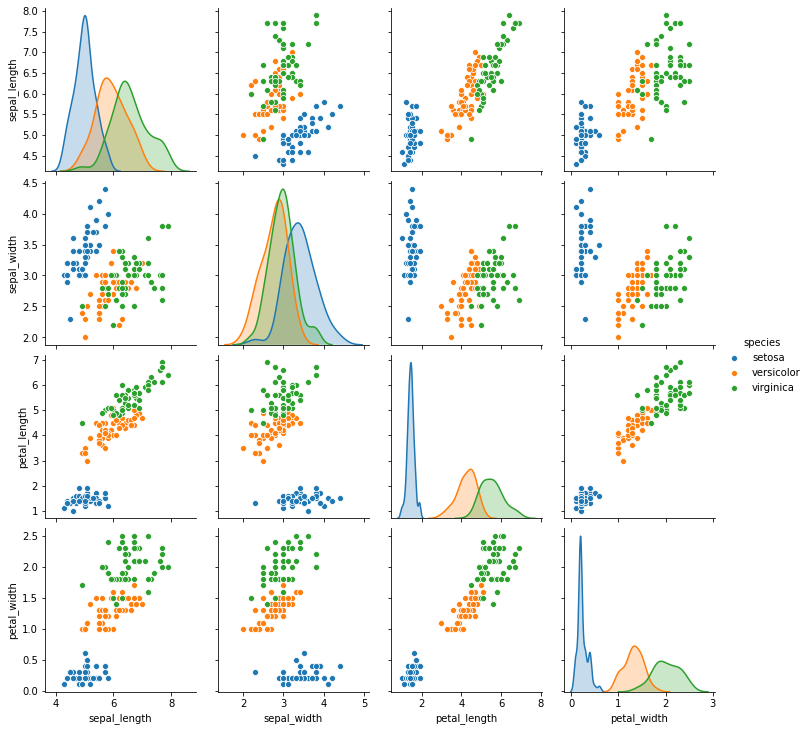

In [ ]:
# Multivariate Analysis with pair plot
sns.pairplot(data.drop("target", axis=1),hue="species",diag_kind="kde")
plt.show()

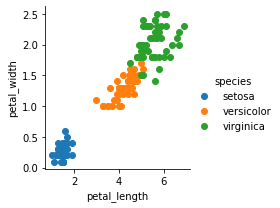

In [ ]:
# scatter plot
sns.FacetGrid(data,hue='species')\
.map(plt.scatter,'petal_length','petal_width')\
.add_legend()
plt.show()

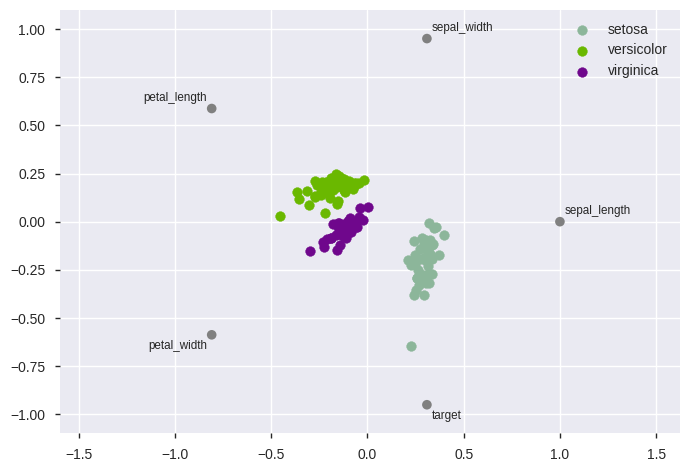

In [ ]:
# N-dimensional data set into a 2D space 
pd.plotting.radviz(data.drop("target", axis=1), 'species')

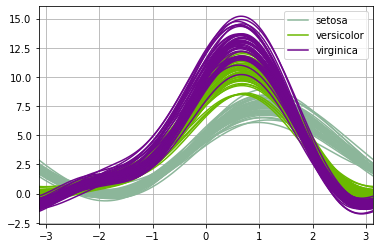

In [ ]:
# Andrew Curves plot for visualising clusters of multivariate data
pd.plotting.andrews_curves(data.drop("target", axis=1), "species")